In [1]:
import pandas as pd
from pandas.io.json import json_normalize
from pymongo import MongoClient
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats  
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import json
from bson.json_util import dumps


/usr/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.4/importlib/_bootstrap.py:321: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
conn = MongoClient('140.115.53.147', 27017)
conn.database_names()

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  


['AU_106_2_BIO',
 'AU_106_2_SE',
 'CYCU_1031SP',
 'CYCU_1041SP',
 'CYCU_1042OS',
 'CYCU_1051SP',
 'CYCU_1052OS',
 'KU_dataset_1',
 'KU_dataset_2',
 'NCU_CHKA',
 'NCU_CHKB',
 'NCU_ETS',
 'NCUx107_Pre_college_calculas',
 'OULAD',
 'admin',
 'config',
 'local',
 'test']

# NCUx

### NCUx - Freshman calculas

In [3]:
db = conn['NCU_ETS']
collection = db['ets_final_score']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,final_score,username
0,5ba66ac098d846d79444b79d,24.5,104602004
1,5ba66ac098d846d79444b79e,74.12,104602005
2,5ba66ac098d846d79444b79f,61.13,104602006


In [4]:
score_df = df['final_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_fc = score_df.astype(int)

### NCUx - chka

In [5]:
db = conn['NCU_CHKA']
collection = db['chka_final_score']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,final_score,username
0,5ba66abe98d846d79444aa71,30,Y1050167
1,5ba66abe98d846d79444aa72,10,Y1050168
2,5ba66abe98d846d79444aa73,0,Y1050169


In [6]:
score_df = df['final_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_chka = score_df.astype(int)

### NCUx - chkb

In [7]:
db = conn['NCU_CHKB']
collection = db['chkb_final_score']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,final_score,username
0,5ba66abf98d846d79444b191,10,Y1050280
1,5ba66abf98d846d79444b192,10,Y1050281
2,5ba66abf98d846d79444b193,10,Y1050282


In [8]:
score_df = df['final_score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_chkb = score_df.astype(int)

### NCUx107_Pre_college_calculas

In [9]:
def flatten(row):
    for grade in row['grades']:
        row[grade['name']] = grade['score']
    return row


In [10]:
db = conn['NCUx107_Pre_college_calculas']
collection = db['students_grades']

#collection_str = dumps(collection.find())
#collection_str = ''.join(collection_list)
#data = json.loads(collection_str)
#df = pd.read_json(data)
#json_normalize(data)
df = pd.DataFrame(list(collection.find()))
#df = df['grades'].to_frame()
#collection_list
df = df.apply(flatten, axis=1)
df = df.drop('grades', axis=1)
df


,_id,bonusGrade,name,rollCallGrade,stageGrade,studentId,週考一,週考二,週考三,週考四,期末考
0,5ba65fa698d846d7943d7013,10.5,81b289dcc218f352b3a33901651cfce5,10,3,107202507,72,78,59,48,61
1,5ba65fa698d846d7943d7014,11.5,97a05f1efbcadf2c039d1f83c4a5c7c0,10,4,107202510,86,78,77,74,73
2,5ba65fa698d846d7943d7015,6,5dd7a481abf9e1cfc06d4b4bca79a88e,11,3,107203503,51,93,48,89,83
3,5ba65fa698d846d7943d7016,1.5,c20a2478947da9d12ccbae89873e51f3,9,0,107202505,59,41,31,33,0
4,5ba65fa698d846d7943d7017,7,f21669bcef59a091558f222e932172ff,11,1,107203509,61,48,22,48,78
5,5ba65fa698d846d7943d7018,7.5,e4383ba7e6025a6765169b4924669491,11,2,107203508,74,82,60,88,96
6,5ba65fa698d846d7943d7019,4.5,8924fb4d1a7755bb6d5b0145299d4a40,11,2,107203518,90,70,85,69,44
7,5ba65fa698d846d7943d701a,0,3e76e5baf086e791ddaa808f719ec4eb,11,2,107203516,86,85,84,94,87
8,5ba65fa698d846d7943d701b,10,b63033b14c5edb41b8fb97f34176b2c3,11,5,107202506,75,46,70,45,42
9,5ba65fa698d846d7943d701c,4,750f0843afd21085f07d99b55cbbf99d,11,0,107203520,86,75,40,35,98


In [11]:
score_df = df['期末考']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ncux_pre = score_df.astype(int)

# CYCU

### CYCU_1031SP

In [12]:
db = conn['CYCU_1031SP']
collection = db['1031bSP2']
df = pd.DataFrame(list(collection.find()))
list(df)

['MOOCs',
 '_id',
 '上課問答',
 '加分小考',
 '協作額外上機',
 '原始總分',
 '姓名',
 '學號',
 '小考一',
 '小考二',
 '最終成績',
 '有完成遊戲',
 '期中考',
 '期末考',
 '班級',
 '程式一',
 '程式三',
 '程式二',
 '線上成績',
 '線上表現']

In [13]:
score_df = df['最終成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1031sp = score_df.astype(int)

### CYCU 1041SP

In [14]:
db = conn['CYCU_1041SP']
collection = db['1041aSP2']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,MOOCs修課及格,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,...,小考一,小考二,最終成績,期中考,期末考,程式一,程式三,程式二,線上成績,線上表現
0,None,學號,姓名,期中考,期末考,程式一,程式二,程式三,第一次小考,第二次小考,...,52,0,28,55,15,0,0,0,1.836735,40.69
1,None,平均,None,44.43333333,33.2,None,None,None,None,None,...,84,0,40,23,30,80,0,0,20.612245,77.89
2,None,None,None,30%,30%,10%,10%,10%,5%,5%,...,52,83,80,63,55,103,92,0,43.061224,74.65


In [15]:
score_df = df['最終成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1041sp = score_df.astype(int)

### CYCU 1051SP

In [16]:
db = conn['CYCU_1051SP']
collection = db['1051aSP2']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,上機,上課問答,上課題目,原始成績,姓名,學號,小考一,小考二,最終成績,期中考,期末考,程式一,程式三,程式二,線上成績,線上表現
0,5ba66ab498d846d794436d34,25,10,50.0,37.41,5054c77c1bdb639d856b7f69b50eb98b,10124341,0,32,40,30,25,95,0,0,19.2,58.912917
1,5ba66ab498d846d794436d35,0,100,21.0,40.84,bb38a73037a2b66ed2447892135dcc19,10227129,52,56,46,30,28,0,0,54,14.0,58.195375
2,5ba66ab498d846d794436d36,75,0,0.0,75.16,5621e2fd33b4a0f00186ab9e68085bd1,10227137,68,80,77,75,65,94,0,0,82.6,65.966333


In [17]:
score_df = df['最終成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1051sp = score_df.astype(int)

### CYCU 1042OS

In [18]:
db = conn['CYCU_1042OS']
collection = db['1042aOS2']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,MOOCs修課及格,_id,上機次數,上課問答,原始總分,姓名,學號,最終成績,期中考,期末考,第一支程式,第一次小考,第三支程式,第三次小考,第二支程式,第二次小考,第四次小考,線上成績,線上表現
0,None,5ba66ab098d846d7944301f9,2,20,48.65,87489bda6b4bd1373d774423d58cd4c4,10125134,67,30,20,98,72,70,72,88,89,36,76.6,81.26
1,None,5ba66ab098d846d7944301fa,2,100,56.10,fc8e80b9b11f98190c6af391238706c1,10220127,74,60,40,98,72,0,58,89,76,36,44.6,71.76
2,None,5ba66ab098d846d7944301fb,2,0,51.75,212cf45f5eabb72d948cc1d4165e1da7,10220140,67,53,28,95,76,28,34,74,79,48,60.0,87.62


In [19]:
score_df = df['最終成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1042os = score_df.astype(int)

### CYCU 1052OS

In [20]:
db = conn['CYCU_1052OS']
collection = db['1052bOS2']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,上課問答,原始分數,原始總分,姓名,學號,最終成績,期中考,期末考,第一支程式,第一次小考,第三支程式,第三次小考,第二支程式,第二次小考,第五次小考,第四次小考,線上作業測驗,線上表現,課堂練習
0,5ba66aba98d846d79443f3f9,10,14.79,5.50,6e04e4abf4a5d39ee5667cdb67093d15,10227228,15,10,0.0,0,50,0,0,0,0,52,56,10.00,56.704167,10.0
1,5ba66aba98d846d79443f3fa,40,20.29,7.55,456a1db66cd270383537f6b890fcb77f,10227106,20,3,8.0,0,40,0,50,0,45,40,0,0.00,56.592361,72.2
2,5ba66aba98d846d79443f3fb,0,61.26,46.05,d16f3be7c1dd6b93dd89097481a03daa,10227232,61,15,23.0,98,40,98,43,98,65,28,44,40.61,78.784201,24.5


In [21]:
score_df = df['最終成績']
score_df = score_df.dropna()
score_df = score_df.astype(float)
cycu_1052os = score_df.astype(int)

# KU

### KU BR01

In [22]:
db = conn['KU_dataset_1']
collection = db['data1_score.csv']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,score,userid
0,5ba2041898d846d794395461,80,ds101
1,5ba2041898d846d794395462,80,ds102
2,5ba2041898d846d794395463,60,ds103


In [23]:
score_df = df['score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ku_br01 = score_df.astype(int)

### KU BR02

In [24]:
db = conn['KU_dataset_2']
collection = db['data2_score.csv']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,_id,score,userid
0,5ba2041a98d846d79439e577,100.0,ds201
1,5ba2041a98d846d79439e578,62.5,ds202
2,5ba2041a98d846d79439e579,87.5,ds203


In [25]:
score_df = df['score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
ku_br02 = score_df.astype(int)

# AU

### AU BIO 106

In [26]:
db = conn['AU_106_2_BIO']
collection = db['AU_106_2_BIO_feature_and_score.csv']
df = pd.DataFrame(list(collection.find()))
df.head(3)

,Add_Bookmark,Add_Marker,Add_Memo,Change_Memo,Close,Delete_Bookmark,Delete_Marker,Delete_Memo,Jump,Marker,Memo,Next,Open,Prev,Search,_id,score,username
0,27,93,9,4,9,1,3,0,3,96,13,551,21,118,0,5badba709e0c6c62033dae1c,82,106013013
1,38,20,4,1,9,2,3,0,0,23,5,308,10,93,0,5badba709e0c6c62033dae1d,79,104013100
2,39,42,8,8,6,2,2,0,35,44,16,419,14,159,6,5badba709e0c6c62033dae1e,78,103042100


In [27]:
score_df = df['score']
score_df = score_df.dropna()
score_df = score_df.astype(float)
au_106bio = score_df.astype(int)

### AU SE 106

In [28]:
db = conn['AU_106_2_SE']
collection = db['AU_106_2_SE_score.csv']
df = pd.DataFrame(list(collection.find()))
df

,_id,class,class_score,final_exam,final_score,grade,midterm,student_id
0,5baccd6198d846d794494019,B,11.5,43.0,32.50,4,64,102052042
1,5baccd6198d846d79449401a,A,39.3,0.0,36.40,4,67,103022080
2,5baccd6198d846d79449401b,A,55.2,51.7,60.03,4,78,103022067
3,5baccd6198d846d79449401c,A,11.1,55.0,37.30,3,72,104022006
4,5baccd6198d846d79449401d,A,73.3,60.0,67.65,4,64,103022155
5,5baccd6198d846d79449401e,A,59.5,60.0,60.50,3,63,104022004
6,5baccd6198d846d79449401f,A,69.5,53.0,60.00,3,48,104022010
7,5baccd6198d846d794494020,A,78.9,60.0,73.95,3,78,104022008
8,5baccd6198d846d794494021,A,60.7,50.7,60.03,3,68,104022016
9,5baccd6198d846d794494022,A,93.1,53.0,83.80,3,96,104022018


In [29]:
score_df = df['final_exam']
score_df = score_df.dropna()
score_df = score_df.astype(float)
au_106se = score_df.astype(int)

# Visualization

In [30]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [31]:
xmin, xmax = 0, 100 
lnspc = np.linspace(xmin, xmax, 1000)

m, s = stats.norm.fit(ncux_fc)  
pdf_g_ncux_fc = stats.norm.pdf(lnspc, m, s) 
print(mean_confidence_interval(ncux_fc))
m, s = stats.norm.fit(ncux_chka)  
pdf_g_ncux_chka = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(ncux_chkb)  
pdf_g_ncux_chkb = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(ncux_pre)  
pdf_g_ncux_pre = stats.norm.pdf(lnspc, m, s) 


m, s = stats.norm.fit(cycu_1031sp)  
pdf_g_cycu_1031sp = stats.norm.pdf(lnspc, m, s)
m, s = stats.norm.fit(cycu_1041sp)  
pdf_g_cycu_1041sp = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(cycu_1051sp)  
pdf_g_cycu_1051sp = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(cycu_1042os)  
pdf_g_cycu_1042os = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(cycu_1052os)  
pdf_g_cycu_1052os = stats.norm.pdf(lnspc, m, s) 

m, s = stats.norm.fit(ku_br01)  
pdf_g_ku01 = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(ku_br02)  
pdf_g_ku02 = stats.norm.pdf(lnspc, m, s)

'''
m, s = stats.norm.fit(au_106bio)  
pdf_g_au106bio = stats.norm.pdf(lnspc, m, s) 
m, s = stats.norm.fit(au_106se)  
pdf_g_au106se = stats.norm.pdf(lnspc, m, s)
'''

(64.59677419354838, 60.03849392973555, 69.15505445736122)


'\nm, s = stats.norm.fit(au_106bio)  \npdf_g_au106bio = stats.norm.pdf(lnspc, m, s) \nm, s = stats.norm.fit(au_106se)  \npdf_g_au106se = stats.norm.pdf(lnspc, m, s)\n'

In [32]:
X = np.array([pdf_g_ncux_fc, 
              pdf_g_ncux_chka, 
              pdf_g_ncux_chkb, 
              pdf_g_ncux_pre,
              pdf_g_cycu_1031sp,
              pdf_g_cycu_1041sp,
              pdf_g_cycu_1051sp,
              pdf_g_cycu_1042os,
              pdf_g_cycu_1052os,
              pdf_g_ku01, 
              pdf_g_ku02])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
labels

array([0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [35]:
ncux_fc_kurs = 'kurtosis=' + str(format(kurtosis(ncux_fc), '.2f'))
ncux_fc_skew = 'skew=' + str(format(skew(ncux_fc), '.2f'))
ncux_fc_type = 'type=' + str(labels[0])
ncux_chka_kurs = 'kurtosis=' + str(format(kurtosis(ncux_chka), '.2f'))
ncux_chka_skew = 'skew=' + str(format(skew(ncux_chka), '.2f'))
ncux_chka_type = 'type=' + str(labels[1])
ncux_chkb_kurs = 'kurtosis=' + str(format(kurtosis(ncux_chkb), '.2f'))
ncux_chkb_skew = 'skew=' + str(format(skew(ncux_chkb), '.2f'))
ncux_chkb_type = 'type=' + str(labels[2])
ncux_pre_kurs = 'kurtosis=' + str(format(kurtosis(ncux_pre), '.2f'))
ncux_pre_skew = 'skew=' + str(format(skew(ncux_pre), '.2f'))
ncux_pre_type = 'type=' + str(labels[3])

cycu_1031sp_kurs = 'kurtosis=' + str(format(kurtosis(cycu_1031sp), '.2f'))
cycu_1031sp_skew = 'skew=' + str(format(skew(cycu_1031sp), '.2f'))
cycu_1031sp_type = 'type=' + str(labels[4])
cycu_1041sp_kurs = 'kurtosis=' + str(format(kurtosis(cycu_1041sp), '.2f'))
cycu_1041sp_skew = 'skew=' + str(format(skew(cycu_1041sp), '.2f'))
cycu_1041sp_type = 'type=' + str(labels[5])
cycu_1051sp_kurs = 'kurtosis=' + str(format(kurtosis(cycu_1051sp), '.2f'))
cycu_1051sp_skew = 'skew=' + str(format(skew(cycu_1051sp), '.2f'))
cycu_1051sp_type = 'type=' + str(labels[6])

cycu_1042os_kurs = 'kurtosis=' + str(format(kurtosis(cycu_1052os), '.2f'))
cycu_1042os_skew = 'skew=' + str(format(skew(cycu_1042os), '.2f'))
cycu_1042os_type = 'type=' + str(labels[7])
cycu_1052os_kurs = 'kurtosis=' + str(format(kurtosis(cycu_1052os), '.2f'))
cycu_1052os_skew = 'skew=' + str(format(skew(cycu_1042os), '.2f'))
cycu_1052os_type = 'type=' + str(labels[8])


ku_br01_kurs = 'kurtosis=' + str(format(kurtosis(ku_br01), '.2f'))
ku_br01_skew = 'skew=' + str(format(skew(ku_br01), '.2f'))
ku_br01_type = 'type=' + str(labels[9])
ku_br02_kurs = 'kurtosis=' + str(format(kurtosis(ku_br02), '.2f'))
ku_br02_skew = 'skew=' + str(format(skew(ku_br02), '.2f'))
ku_br02_type = 'type=' + str(labels[10])

'''
au_106bio_kurs = 'kurtosis=' + str(format(kurtosis(au_106bio), '.2f'))
au_106bio_skew = 'skew=' + str(format(skew(au_106bio), '.2f'))
au_106bio_type = 'type=' + str(labels[10])
au_106se_kurs = 'kurtosis=' + str(format(kurtosis(au_106se), '.2f'))
au_106se_skew = 'skew=' + str(format(skew(au_106se), '.2f'))
au_106se_type = 'type=' + str(labels[11])
'''

"\nau_106bio_kurs = 'kurtosis=' + str(format(kurtosis(au_106bio), '.2f'))\nau_106bio_skew = 'skew=' + str(format(skew(au_106bio), '.2f'))\nau_106bio_type = 'type=' + str(labels[10])\nau_106se_kurs = 'kurtosis=' + str(format(kurtosis(au_106se), '.2f'))\nau_106se_skew = 'skew=' + str(format(skew(au_106se), '.2f'))\nau_106se_type = 'type=' + str(labels[11])\n"

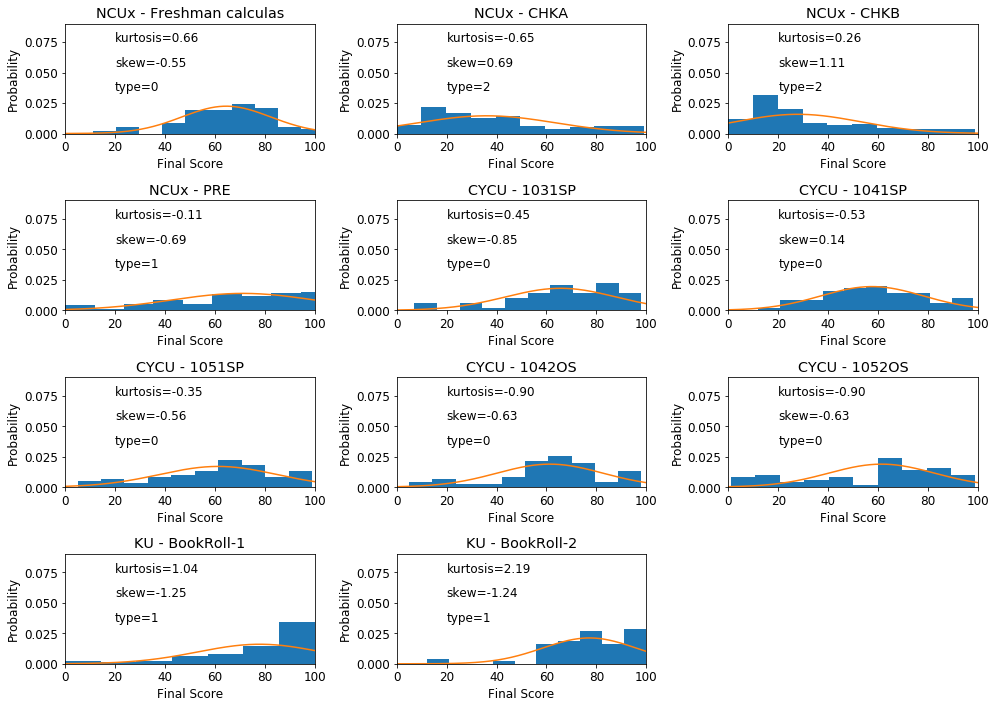

In [37]:
matplotlib.rcParams.update({'font.size': 12})

plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

label = ['Validation', 'Testing']
bins = 10
ylimit = 0.09
subplot_x = 4
subplot_y = 3

ax = plt.subplot(subplot_x, subplot_y, 1)
plt.hist(ncux_fc, bins = bins, density=True)
plt.plot(lnspc, pdf_g_ncux_fc, label="Norm") # plot it
plt.title('NCUx - Freshman calculas')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(ncux_fc_kurs, xy=(20, 0.075))
ax.annotate(ncux_fc_skew, xy=(20, 0.055))
ax.annotate(ncux_fc_type, xy=(20, 0.035))
#plt.legend(['Training', 'Testing'])

ax = plt.subplot(subplot_x, subplot_y, 2)
plt.hist(ncux_chka, bins = bins, density=True)
plt.plot(lnspc, pdf_g_ncux_chka, label="Norm") # plot it
plt.title('NCUx - CHKA')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(ncux_chka_kurs, xy=(20, 0.075))
ax.annotate(ncux_chka_skew, xy=(20, 0.055))
ax.annotate(ncux_chka_type, xy=(20, 0.035))

ax = plt.subplot(subplot_x, subplot_y, 3)
plt.hist(ncux_chkb, bins = bins, density=True)
plt.plot(lnspc, pdf_g_ncux_chkb, label="Norm") # plot it
plt.title('NCUx - CHKB')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(ncux_chkb_kurs, xy=(20, 0.075))
ax.annotate(ncux_chkb_skew, xy=(20, 0.055))
ax.annotate(ncux_chka_type, xy=(20, 0.035))

ax = plt.subplot(subplot_x, subplot_y, 4)
plt.hist(ncux_pre, bins = bins, density=True)
plt.plot(lnspc, pdf_g_ncux_pre, label="Norm") # plot it
plt.title('NCUx - PRE')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(ncux_pre_kurs, xy=(20, 0.075))
ax.annotate(ncux_pre_skew, xy=(20, 0.055))
ax.annotate(ncux_pre_type, xy=(20, 0.035))




ax = plt.subplot(subplot_x, subplot_y, 5)
plt.hist(cycu_1031sp, bins = bins, density=True)
plt.plot(lnspc, pdf_g_cycu_1031sp, label="Norm") # plot it
plt.title('CYCU - 1031SP')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(cycu_1031sp_kurs, xy=(20, 0.075))
ax.annotate(cycu_1031sp_skew, xy=(20, 0.055))
ax.annotate(cycu_1031sp_type, xy=(20, 0.035))

ax = plt.subplot(subplot_x, subplot_y, 6)
plt.hist(cycu_1041sp, bins = bins, density=True)
plt.plot(lnspc, pdf_g_cycu_1041sp, label="Norm") # plot it
plt.title('CYCU - 1041SP')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(cycu_1041sp_kurs, xy=(20, 0.075))
ax.annotate(cycu_1041sp_skew, xy=(20, 0.055))
ax.annotate(cycu_1041sp_type, xy=(20, 0.035))

ax = plt.subplot(subplot_x, subplot_y, 7)
plt.hist(cycu_1051sp, bins = bins, density=True)
plt.plot(lnspc, pdf_g_cycu_1051sp, label="Norm") # plot it
plt.title('CYCU - 1051SP')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(cycu_1051sp_kurs, xy=(20, 0.075))
ax.annotate(cycu_1051sp_skew, xy=(20, 0.055))
ax.annotate(cycu_1051sp_type, xy=(20, 0.035))

ax = plt.subplot(subplot_x, subplot_y, 8)
plt.hist(cycu_1042os, bins = bins, density=True)
plt.plot(lnspc, pdf_g_cycu_1042os, label="Norm") # plot it
plt.title('CYCU - 1042OS')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(cycu_1042os_kurs, xy=(20, 0.075))
ax.annotate(cycu_1042os_skew, xy=(20, 0.055))
ax.annotate(cycu_1042os_type, xy=(20, 0.035))

ax = plt.subplot(subplot_x, subplot_y, 9)
plt.hist(cycu_1052os, bins = bins, density=True)
plt.plot(lnspc, pdf_g_cycu_1042os, label="Norm") # plot it
plt.title('CYCU - 1052OS')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(cycu_1052os_kurs, xy=(20, 0.075))
ax.annotate(cycu_1052os_skew, xy=(20, 0.055))
ax.annotate(cycu_1052os_type, xy=(20, 0.035))


ax = plt.subplot(subplot_x, subplot_y, 10)
plt.hist(ku_br01, bins = 7, density=True)
plt.plot(lnspc, pdf_g_ku01, label="Norm") # plot it
plt.title('KU - BookRoll-1')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(ku_br01_kurs, xy=(20, 0.075))
ax.annotate(ku_br01_skew, xy=(20, 0.055))
ax.annotate(ku_br01_type, xy=(20, 0.035))

ax = plt.subplot(subplot_x, subplot_y, 11)
plt.hist(ku_br02, bins = bins, density=True)
plt.plot(lnspc, pdf_g_ku02, label="Norm") # plot it
plt.title('KU - BookRoll-2')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(ku_br02_kurs, xy=(20, 0.075))
ax.annotate(ku_br02_skew, xy=(20, 0.055))
ax.annotate(ku_br02_type, xy=(20, 0.035))



'''
ax = plt.subplot(subplot_x, subplot_y, 12)
plt.hist(au_106bio, bins = bins, density=True)
plt.plot(lnspc, pdf_g_au106bio, label="Norm") # plot it
plt.title('AU - BIO')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(au_106bio_kurs, xy=(20, 0.075))
ax.annotate(au_106bio_skew, xy=(20, 0.055))
ax.annotate(au_106bio_type, xy=(20, 0.035))

ax = plt.subplot(subplot_x, subplot_y, 13)
plt.hist(au_106se, bins = bins, density=True)
plt.plot(lnspc, pdf_g_au106se, label="Norm") # plot it
plt.title('AU - SE')
plt.ylabel('Probability')
plt.xlabel('Final Score')
plt.xlim(0, 100)
plt.ylim(0, ylimit)
ax.annotate(au_106se_kurs, xy=(20, 0.075))
ax.annotate(au_106se_skew, xy=(20, 0.055))
ax.annotate(au_106se_type, xy=(20, 0.035))
'''

plt.tight_layout()
plt.savefig('./images/score_distribution.png', dpi=300)

#plt.show()

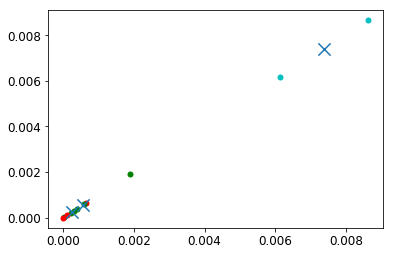

In [38]:
colors = ["g.","r.", "c."]
#colors = ["g.","r."]

for i in range(len(X)):
    #print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

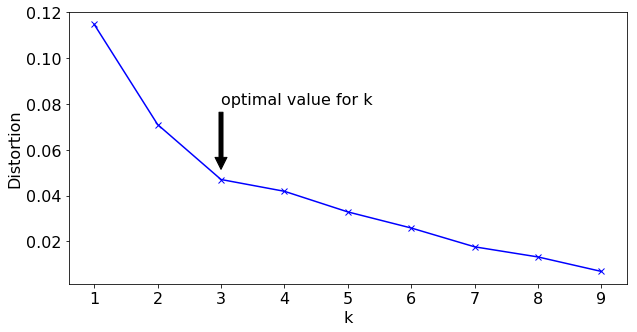

In [51]:
# k means determine k
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(10, 5))

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    
    
lablestring = 'optimal value for k'
plt.annotate(lablestring, xy=(3, 0.05), xytext=(3, 0.08),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
#plt.title('The Elbow Method showing the optimal k')
plt.savefig('./images/elbow.png', dpi=300)
plt.show()

In [40]:
'kurtosis=' + str(format(kurtosis(ku_br02), '.2f'))

'kurtosis=2.19'